# Modelo para avaliar o fine-tuning no modelo base, inicializando suas últimas camadas com pesos aleatórios

Neste código, serão avaliados dois modelos:

- 1º modelo: Utilizando 70% do dataset Supermarket Produce para treino e 30% para teste (fine-tuning), com o modelo base original;
- 2º modelo: Utilizando 70% do dataset Supermarket Produce para treino e 30% para teste (fine-tuning), com as últimas camadas do modelo base tendo seus pesos reinicializados.

In [1]:
import tensorflow as tf
print("Versão do TensorFlow:", tf.__version__)

import keras
print("versão do Keras:", keras.__version__)

# IMPORTANDO COMANDOS E FUNÇÕES #

import numpy as np
import h5py
import matplotlib.pyplot as plt #gerar gráfico
import os
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks           import EarlyStopping

from sklearn.metrics import classification_report, confusion_matrix, balanced_accuracy_score, accuracy_score

import pickle

# IMPORTANDO LAYERS PARA A CNN #

from keras.models import Sequential
from keras        import layers
from keras.layers import Dropout

Versão do TensorFlow: 2.5.0
versão do Keras: 2.5.0


In [2]:
# Definindo uma semente para treinamento

semente = 13

from numpy.random import seed
seed(semente)

tf.random.set_seed(semente)

In [3]:
from functions_extras import criar_treino_teste

In [4]:
criar_treino_teste('./dataset_smkt/', 0.3)

Criando particionamento
	 148 	+ 64 	= 212 	 -> apple1
	 108 	+ 47 	= 155 	 -> granny_smith_apple
	 119 	+ 52 	= 171 	 -> kiwi
	 74 	+ 32 	= 106 	 -> lime
	 172 	+ 75 	= 247 	 -> nectarine
	 52 	+ 23 	= 75 	 -> onion
	 147 	+ 64 	= 211 	 -> peach
	 111 	+ 48 	= 159 	 -> pear
	 184 	+ 80 	= 264 	 -> plum
	 140 	+ 61 	= 201 	 -> potato
	 134 	+ 58 	= 192 	 -> watermelon
Particionamento criado com sucesso!


In [5]:
# DIVIDIR AS IMAGENS EM PARTIÇÃO DE TREINO E VALIDAÇÃO, UTILIZANDO O IMAGEDATAGENERATOR #

datagen =  ImageDataGenerator(rescale = 1./255, validation_split=0.2) # comando para reescala + divisão em 20% para validação

# imagens de treino (80%) 

train_data = datagen.flow_from_directory('dataset_smkt/train', 
                                         subset = 'training',
                                         batch_size = 64,
                                         target_size = (100, 100)) # definindo tamanho das imagens

# imagens de validação (20%)

valid_data = datagen.flow_from_directory('dataset_smkt/train',
                                         subset='validation',
                                         batch_size = 64,
                                         target_size = (100, 100))

# imagens de teste (30% do conjunto todo)

datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=False)

Found 1117 images belonging to 11 classes.
Found 272 images belonging to 11 classes.
Found 604 images belonging to 11 classes.


# Modelo sem .pop()

In [6]:
# Criando modelo

model = keras.models.load_model('model.h5')

In [7]:
print(tf.__version__)

2.5.0


In [8]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [9]:
# DEFININDO O COMANDO EARLYSTOPPING #

es = EarlyStopping(monitor='val_accuracy', mode='max', verbose=1, patience = 13)

In [10]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
18/18 [==============================] - 35s 1s/step - loss: 12.2773 - accuracy: 0.1022 - val_loss: 2.1783 - val_accuracy: 0.2022
Epoch 2/100
18/18 [==============================] - 21s 1s/step - loss: 2.3117 - accuracy: 0.1724 - val_loss: 2.0417 - val_accuracy: 0.3493
Epoch 3/100
18/18 [==============================] - 21s 1s/step - loss: 1.8960 - accuracy: 0.3303 - val_loss: 1.6798 - val_accuracy: 0.5331
Epoch 4/100
18/18 [==============================] - 21s 1s/step - loss: 1.5042 - accuracy: 0.4614 - val_loss: 1.3881 - val_accuracy: 0.5809
Epoch 5/100
18/18 [==============================] - 21s 1s/step - loss: 1.1828 - accuracy: 0.5786 - val_loss: 1.2124 - val_accuracy: 0.6140
Epoch 6/100
18/18 [==============================] - 21s 1s/step - loss: 0.9337 - accuracy: 0.6558 - val_loss: 1.3250 - val_accuracy: 0.4963
Epoch 7/100
18/18 [==============================] - 21s 1s/step - loss: 0.9335 - accuracy: 0.6842 - val_loss: 1.1437 - val_accuracy: 0.5588
Epoch 8/100


In [11]:
model.save('model_3est_sp.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_3est_sp', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [29]:
model_3est = keras.models.load_model('model_3est_sp.h5')
history = pickle.load(open('trainHistoryDict_model_3est_sp', "rb"))

In [30]:
model_3est.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

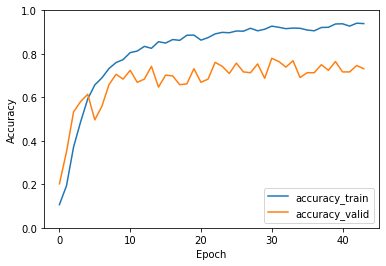

In [31]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

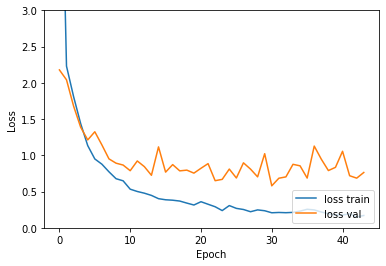

In [32]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [16]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_3est.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

604/604 [==============================] - 8s 13ms/step - loss: 0.2180 - accuracy: 0.9172
acurácia nos dados de teste: 0.9172185659408569
loss dos dados de teste: 0.21796609461307526


In [17]:
Y_pred = model_3est.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(604,)
Accuracy
0.9172185430463576
Balanced Accuracy
0.9149451568566856
Confusion Matrix
[[60  0  0  0  0  0  3  1  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0  0]
 [ 0  0 38  0 10  0  1  2  1  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  1]
 [ 2  0  0  0 73  0  0  0  0  0  0]
 [ 0  0  0  0  0 21  0  0  0  2  0]
 [ 8  0  1  0  0  0 55  0  0  0  0]
 [ 0  0  0  0  0  0  5 41  0  1  1]
 [ 2  0  0  0  0  0  0  0 78  0  0]
 [ 0  0  5  0  0  0  0  4  0 52  0]
 [ 0  0  0  0  0  0  0  0  0  0 58]]
Classification Report


# Modelo com o .pop()

In [18]:
# Criando modelo

model = keras.models.load_model('model.h5')

model.pop()
model.pop()
model.pop()
model.pop()

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5, name="dropout_3"))
model.add(layers.Dense(units = 11, activation = 'softmax'))


model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

In [19]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.CategoricalCrossentropy(
                  from_logits=False,
                  label_smoothing=0,                            #configurações da função loss
                  reduction="auto",
                  name="categorical_crossentropy"),
              metrics=['accuracy'])

In [20]:
# INÍCIO DO TREINO DO MODELO #

history = model.fit(train_data,
                    epochs=100,
                    validation_data=valid_data,
                    callbacks = [es])

# informação: steps_per_epoch = número de imagens / batch_size

Epoch 1/100
18/18 [==============================] - 26s 1s/step - loss: 2.5239 - accuracy: 0.2683 - val_loss: 1.5097 - val_accuracy: 0.4779
Epoch 2/100
18/18 [==============================] - 23s 1s/step - loss: 1.3493 - accuracy: 0.5255 - val_loss: 1.3048 - val_accuracy: 0.5184
Epoch 3/100
18/18 [==============================] - 24s 1s/step - loss: 1.0208 - accuracy: 0.6468 - val_loss: 1.0564 - val_accuracy: 0.6434
Epoch 4/100
18/18 [==============================] - 23s 1s/step - loss: 0.7514 - accuracy: 0.7373 - val_loss: 0.9341 - val_accuracy: 0.6360
Epoch 5/100
18/18 [==============================] - 23s 1s/step - loss: 0.6770 - accuracy: 0.7603 - val_loss: 0.9133 - val_accuracy: 0.7316
Epoch 6/100
18/18 [==============================] - 23s 1s/step - loss: 0.5474 - accuracy: 0.8136 - val_loss: 0.8757 - val_accuracy: 0.7022
Epoch 7/100
18/18 [==============================] - 23s 1s/step - loss: 0.3908 - accuracy: 0.8793 - val_loss: 0.8095 - val_accuracy: 0.7279
Epoch 8/100
1

In [21]:
model.save('model_comando_pop.h5',
          overwrite = True) 
del model

with open('trainHistoryDict_model_comando_pop', 'wb') as file_pi:
        pickle.dump(history.history, file_pi)

In [22]:
model_comando_pop = keras.models.load_model('model_comando_pop.h5')
history = pickle.load(open('trainHistoryDict_model_comando_pop', "rb"))

In [23]:
model_comando_pop.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 98, 98, 32)        896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 49, 49, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 49, 49, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 47, 47, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 23, 23, 64)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 23, 23, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 21, 21, 64)        3

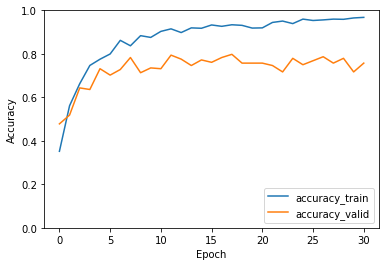

In [24]:
# GERANDO GRÁFICO COM RESULTADOS DAS ACURÁCIAS DE TREINO E VALIDAÇÃO #

plt.plot(history['accuracy'], label='accuracy_train')
plt.plot(history['val_accuracy'], label = 'accuracy_valid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0, 1])
plt.legend(loc='lower right')

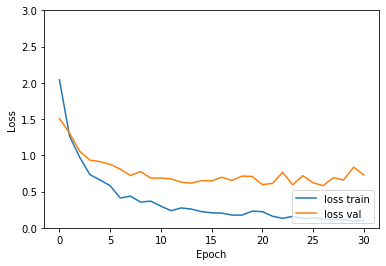

In [25]:
# GERANDO GRÁFICO COM RESULTADOS DO LOSS DE TREINO E VALIDAÇÃO #

plt.plot(history['loss'], label='loss train')
plt.plot(history['val_loss'], label='loss val')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.ylim([0, 3])
plt.legend(loc='lower right')

In [26]:
datagen_test =  ImageDataGenerator(rescale = 1./255) # comando para reescala das imagens de teste

# imagens de teste

test_data = datagen_test.flow_from_directory(directory='dataset_smkt/test',
                                             target_size = (100, 100),
                                             batch_size = 1,
                                             shuffle=False)

Found 604 images belonging to 11 classes.


In [27]:
# DEFININDO COMANDO PARA AVALIAR O DESEMPENHO DO MODELO NAS IMAGENS DE TESTE #

test_loss, test_acc = model_comando_pop.evaluate(test_data) # verificar versão do Keras

print("acurácia nos dados de teste:", test_acc)
print("loss dos dados de teste:", test_loss)

604/604 [==============================] - 8s 12ms/step - loss: 0.1900 - accuracy: 0.9272
acurácia nos dados de teste: 0.9271523356437683
loss dos dados de teste: 0.19000540673732758


In [28]:
Y_pred = model_comando_pop.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)

print(y_pred.shape)

print('Accuracy')
print(accuracy_score(test_data.classes,y_pred))

print('Balanced Accuracy')
print(balanced_accuracy_score(test_data.classes,y_pred))

print('Confusion Matrix')
print(confusion_matrix(test_data.classes, y_pred))
print('Classification Report')

(604,)
Accuracy
0.9271523178807947
Balanced Accuracy
0.9257261002867246
Confusion Matrix
[[61  0  0  0  0  0  2  1  0  0  0]
 [ 0 47  0  0  0  0  0  0  0  0  0]
 [ 0  0 40  0  9  0  1  2  0  0  0]
 [ 0  0  0 31  0  0  0  0  0  0  1]
 [ 1  0  0  0 73  0  0  0  0  1  0]
 [ 0  0  0  0  0 21  0  0  0  2  0]
 [ 8  0  1  0  0  0 52  3  0  0  0]
 [ 0  0  0  0  0  0  2 45  0  0  1]
 [ 1  0  0  0  0  0  0  0 79  0  0]
 [ 0  0  0  0  0  0  0  7  0 54  0]
 [ 0  0  0  0  0  0  0  1  0  0 57]]
Classification Report


# 